<a href="https://colab.research.google.com/github/Kishan-Kumar-Zalavadia/Material-Science/blob/main/code_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Try-1

In [ ]:
x = "t. strain.4"
y1 = "t. stress.4"
y2 = "hard.Rate.4"

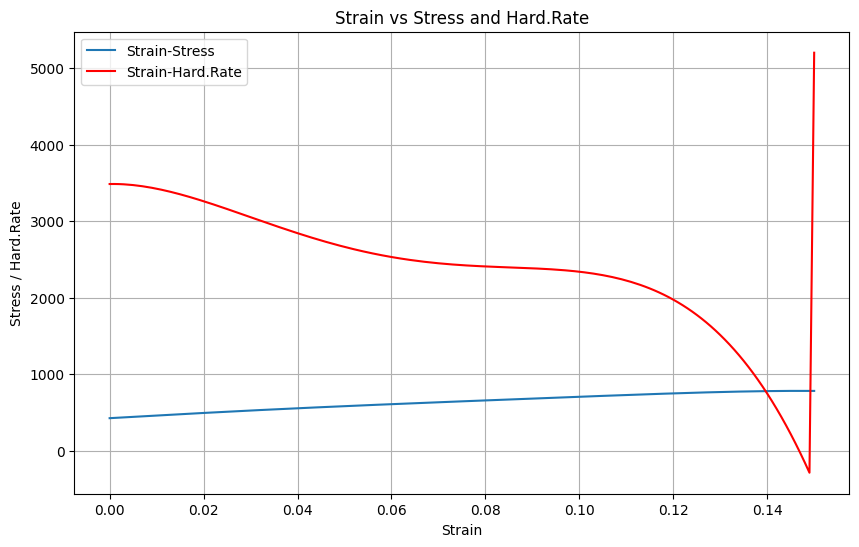

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the Excel file into a pandas DataFrame
df = pd.read_excel('/content/Data.xlsx')

# Extracting data for strain-stress plot
strain_stress_data = df[[x, y1]]

# Extracting data for strain-hard.rate plot
strain_hard_rate_data = df[[x, y2]]

# Plotting both curves in a single plot
plt.figure(figsize=(10, 6))

# Plot strain-stress curve
plt.plot(strain_stress_data[x], strain_stress_data[y1], label='Strain-Stress')

# Plot strain-hard.rate curve with a different color
plt.plot(strain_hard_rate_data[x], strain_hard_rate_data[y2], label='Strain-Hard.Rate', color='red')

# Adding labels and title
plt.xlabel('Strain')
plt.ylabel('Stress / Hard.Rate')
plt.title('Strain vs Stress and Hard.Rate')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()


## Generate the equations of the graph and find the Intersection point

In [ ]:
import numpy as np
import pandas as pd
from scipy.interpolate import make_interp_spline
from scipy.optimize import fsolve

# Read Excel file
file_path = '/content/Data.xlsx'
df = pd.read_excel(file_path)

# Extract x and y columns
x_strain_stress = df[x].values
y_strain_stress = df[y1].values

x_strain_hard_rate = df[x].values
y_strain_hard_rate = df[y2].values

# Check for and handle NaN or infinite values for strain-stress curve
mask_strain_stress = np.isfinite(x_strain_stress) & np.isfinite(y_strain_stress)
x_strain_stress = x_strain_stress[mask_strain_stress]
y_strain_stress = y_strain_stress[mask_strain_stress]

# Check for and handle NaN or infinite values for strain-hard.rate curve
mask_strain_hard_rate = np.isfinite(x_strain_hard_rate) & np.isfinite(y_strain_hard_rate)
x_strain_hard_rate = x_strain_hard_rate[mask_strain_hard_rate]
y_strain_hard_rate = y_strain_hard_rate[mask_strain_hard_rate]

# Set the value of k for spline interpolation for strain-stress curve
k_value_strain_stress = 5

# Set the value of k for spline interpolation for strain-hard.rate curve
k_value_strain_hard_rate = 2

# Perform cubic spline interpolation for strain-stress curve
spline_interp_strain_stress = make_interp_spline(x_strain_stress, y_strain_stress, k=k_value_strain_stress)

# Perform cubic spline interpolation for strain-hard.rate curve
spline_interp_strain_hard_rate = make_interp_spline(x_strain_hard_rate, y_strain_hard_rate, k=k_value_strain_hard_rate)

# Fit cubic polynomial to the entire dataset for strain-stress curve
coefficients_strain_stress = np.polyfit(x_strain_stress, y_strain_stress, k_value_strain_stress)
cubic_equation_strain_stress = np.poly1d(coefficients_strain_stress)

# Fit cubic polynomial to the entire dataset for strain-hard.rate curve
coefficients_strain_hard_rate = np.polyfit(x_strain_hard_rate, y_strain_hard_rate, k_value_strain_hard_rate)
cubic_equation_strain_hard_rate = np.poly1d(coefficients_strain_hard_rate)

# Print the coefficients and equations
print("Equation for Strain-Stress Curve:")
print(cubic_equation_strain_stress)
print()

print("Equation for Strain-Hard.Rate Curve:")
print(cubic_equation_strain_hard_rate)


# Define a function to find the difference between the two equations
def equations(vars):
    x, y = vars
    eq1 = cubic_equation_strain_stress(x) - y
    eq2 = cubic_equation_strain_hard_rate(x) - y
    return [eq1, eq2]

# Initial guess for the intersection point
initial_guess = [0, 0]

# Find the intersection point
intersection_point = fsolve(equations, initial_guess)

# Calculate stress and hard rate at the intersection point
strain_intersection = intersection_point[0]
stress_intersection = cubic_equation_strain_stress(strain_intersection)
hard_rate_intersection = cubic_equation_strain_hard_rate(strain_intersection)

# Print the intersection point
print("Intersection Point (Strain, Stress, Hard.Rate):", (strain_intersection, stress_intersection, hard_rate_intersection))


Equation for Strain-Stress Curve:
            5             4            3        2
-1.127e+07 x + 3.275e+06 x - 2.94e+05 x + 1062 x + 3485 x + 423.9

Equation for Strain-Hard.Rate Curve:
            2
-6.951e+04 x - 5553 x + 3335
Intersection Point (Strain, Stress, Hard.Rate): (0.15606730281911693, 775.5026010912296, 775.5026010912052)


Equation for Strain-Stress Curve:
            5             4            3        2
-1.127e+07 x + 3.275e+06 x - 2.94e+05 x + 1062 x + 3485 x + 423.9

Equation for Strain-Hard.Rate Curve:
           5             4             3             2
1.194e+09 x - 4.617e+08 x + 6.134e+07 x - 3.256e+06 x + 4.525e+04 x + 3309
Intersection Point (Strain, Stress, Hard.Rate): (-0.020655049474278403, 355.59743122590976, 355.5974312246326)


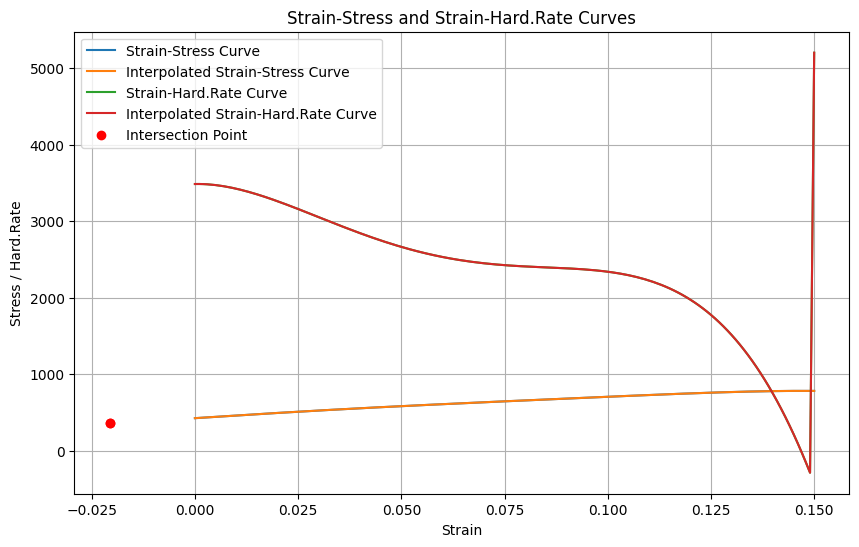

In [ ]:
import numpy as np
import pandas as pd
from scipy.interpolate import make_interp_spline
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

# Read Excel file
file_path = '/content/Data.xlsx'
df = pd.read_excel(file_path)

# Extract x and y columns
x_strain_stress = df[x].values
y_strain_stress = df[y1].values

x_strain_hard_rate = df[x].values
y_strain_hard_rate = df[y2].values

# Check for and handle NaN or infinite values for strain-stress curve
mask_strain_stress = np.isfinite(x_strain_stress) & np.isfinite(y_strain_stress)
x_strain_stress = x_strain_stress[mask_strain_stress]
y_strain_stress = y_strain_stress[mask_strain_stress]

# Check for and handle NaN or infinite values for strain-hard.rate curve
mask_strain_hard_rate = np.isfinite(x_strain_hard_rate) & np.isfinite(y_strain_hard_rate)
x_strain_hard_rate = x_strain_hard_rate[mask_strain_hard_rate]
y_strain_hard_rate = y_strain_hard_rate[mask_strain_hard_rate]

# Set the value of k for spline interpolation for strain-stress curve
k_value_strain_stress = 5

# Set the value of k for spline interpolation for strain-hard.rate curve
k_value_strain_hard_rate = 5

# Perform cubic spline interpolation for strain-stress curve
spline_interp_strain_stress = make_interp_spline(x_strain_stress, y_strain_stress, k=k_value_strain_stress)

# Perform cubic spline interpolation for strain-hard.rate curve
spline_interp_strain_hard_rate = make_interp_spline(x_strain_hard_rate, y_strain_hard_rate, k=k_value_strain_hard_rate)

# Fit cubic polynomial to the entire dataset for strain-stress curve
coefficients_strain_stress = np.polyfit(x_strain_stress, y_strain_stress, k_value_strain_stress)
cubic_equation_strain_stress = np.poly1d(coefficients_strain_stress)

# Fit cubic polynomial to the entire dataset for strain-hard.rate curve
coefficients_strain_hard_rate = np.polyfit(x_strain_hard_rate, y_strain_hard_rate, k_value_strain_hard_rate)
cubic_equation_strain_hard_rate = np.poly1d(coefficients_strain_hard_rate)

# Print the coefficients and equations
print("Equation for Strain-Stress Curve:")
print(cubic_equation_strain_stress)
print()

print("Equation for Strain-Hard.Rate Curve:")
print(cubic_equation_strain_hard_rate)


# Define a function to find the difference between the two equations
def equations(vars):
    x, y = vars
    eq1 = cubic_equation_strain_stress(x) - y
    eq2 = cubic_equation_strain_hard_rate(x) - y
    return [eq1, eq2]

# Initial guess for the intersection point
initial_guess = [0, 0]

# Find the intersection point
intersection_point = fsolve(equations, initial_guess)

# Calculate stress and hard rate at the intersection point
strain_intersection = intersection_point[0]
stress_intersection = cubic_equation_strain_stress(strain_intersection)
hard_rate_intersection = cubic_equation_strain_hard_rate(strain_intersection)

# Print the intersection point
print("Intersection Point (Strain, Stress, Hard.Rate):", (strain_intersection, stress_intersection, hard_rate_intersection))

# Plot the curves
plt.figure(figsize=(10, 6))

# Plot strain-stress curve
plt.plot(x_strain_stress, y_strain_stress, label='Strain-Stress Curve')
plt.plot(x_strain_stress, spline_interp_strain_stress(x_strain_stress), label='Interpolated Strain-Stress Curve')

# Plot strain-hard.rate curve
plt.plot(x_strain_hard_rate, y_strain_hard_rate, label='Strain-Hard.Rate Curve')
plt.plot(x_strain_hard_rate, spline_interp_strain_hard_rate(x_strain_hard_rate), label='Interpolated Strain-Hard.Rate Curve')

# Plot intersection point
plt.scatter(strain_intersection, stress_intersection, color='red', label='Intersection Point')
plt.scatter(strain_intersection, hard_rate_intersection, color='red')

plt.xlabel('Strain')
plt.ylabel('Stress / Hard.Rate')
plt.title('Strain-Stress and Strain-Hard.Rate Curves')
plt.legend()
plt.grid(True)
plt.show()


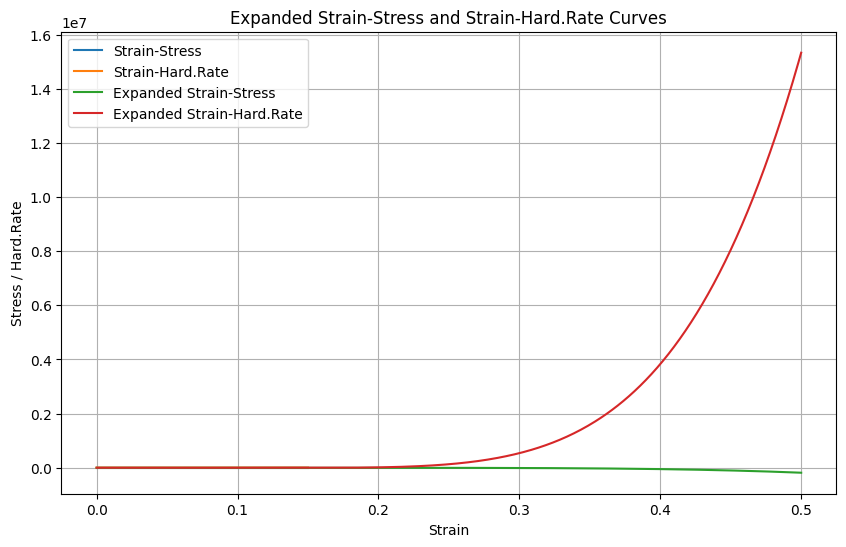

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read Excel file
file_path = '/content/Data.xlsx'
df = pd.read_excel(file_path)

# Extract strain, stress, and hard.rate data
strain = df[x]
stress = df[y1]
hard_rate = df[y2]

# Plot the original data
plt.figure(figsize=(10, 6))
plt.plot(strain, stress, label='Strain-Stress')
plt.plot(strain, hard_rate, label='Strain-Hard.Rate')

# Generate strain values for expansion up to x = 0.6
expanded_strain = np.linspace(min(strain), 0.5, 500)

# Plot expanded Strain-Stress curve using the first equation
# Here you would use your first equation, cubic_equation_strain_stress
expanded_stress = cubic_equation_strain_stress(expanded_strain)
plt.plot(expanded_strain, expanded_stress, label='Expanded Strain-Stress')

# Plot expanded Strain-Hard.Rate curve using the second equation
# Here you would use your second equation, cubic_equation_strain_hard_rate
expanded_hard_rate = cubic_equation_strain_hard_rate(expanded_strain)
plt.plot(expanded_strain, expanded_hard_rate, label='Expanded Strain-Hard.Rate')

plt.xlabel('Strain')
plt.ylabel('Stress / Hard.Rate')
plt.title('Expanded Strain-Stress and Strain-Hard.Rate Curves')
plt.legend()
plt.grid(True)
plt.show()


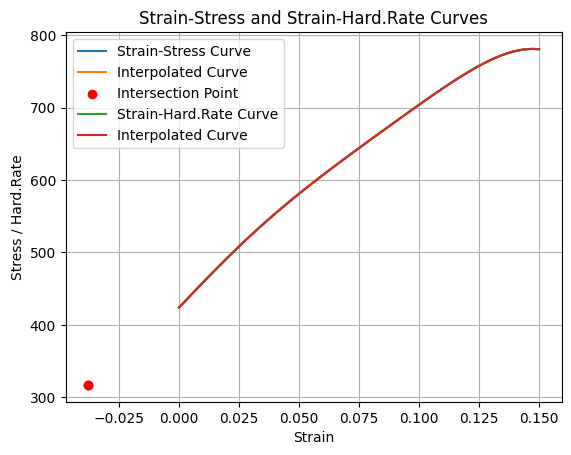

Intersection Point (Strain, Stress, Hard.Rate): (-0.03784486970412691, 317.05649064764987, 317.05649064764987)


In [ ]:
import numpy as np
import pandas as pd
from scipy.interpolate import make_interp_spline
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

# Read Excel file
file_path = '/content/Data.xlsx'
df = pd.read_excel(file_path)

# Extract x and y columns
x_strain_stress = df[x].values
y_strain_stress = df[y1].values

x_strain_hard_rate = df[x].values
y_strain_hard_rate = df[y1].values

# Check for and handle NaN or infinite values for strain-stress curve
mask_strain_stress = np.isfinite(x_strain_stress) & np.isfinite(y_strain_stress)
x_strain_stress = x_strain_stress[mask_strain_stress]
y_strain_stress = y_strain_stress[mask_strain_stress]

# Check for and handle NaN or infinite values for strain-hard.rate curve
mask_strain_hard_rate = np.isfinite(x_strain_hard_rate) & np.isfinite(y_strain_hard_rate)
x_strain_hard_rate = x_strain_hard_rate[mask_strain_hard_rate]
y_strain_hard_rate = y_strain_hard_rate[mask_strain_hard_rate]

# Set the value of k for spline interpolation for strain-stress curve
k_value_strain_stress = 5

# Set the value of k for spline interpolation for strain-hard.rate curve
k_value_strain_hard_rate = 5

# Perform cubic spline interpolation for strain-stress curve
spline_interp_strain_stress = make_interp_spline(x_strain_stress, y_strain_stress, k=k_value_strain_stress)

# Perform cubic spline interpolation for strain-hard.rate curve
spline_interp_strain_hard_rate = make_interp_spline(x_strain_hard_rate, y_strain_hard_rate, k=k_value_strain_hard_rate)

# Fit cubic polynomial to the entire dataset for strain-stress curve
coefficients_strain_stress = np.polyfit(x_strain_stress, y_strain_stress, k_value_strain_stress)
cubic_equation_strain_stress = np.poly1d(coefficients_strain_stress)

# Fit cubic polynomial to the entire dataset for strain-hard.rate curve
coefficients_strain_hard_rate = np.polyfit(x_strain_hard_rate, y_strain_hard_rate, k_value_strain_hard_rate)
cubic_equation_strain_hard_rate = np.poly1d(coefficients_strain_hard_rate)

# Define a function to find the difference between the two equations
def equations(vars):
    x, y = vars
    eq1 = cubic_equation_strain_stress(x) - y
    eq2 = cubic_equation_strain_hard_rate(x) - y
    return [eq1, eq2]

# Initial guess for the intersection point
initial_guess = [0, 0]

# Find the intersection point
intersection_point = fsolve(equations, initial_guess)

# Calculate stress and hard rate at the intersection point
strain_intersection = intersection_point[0]
stress_intersection = cubic_equation_strain_stress(strain_intersection)
hard_rate_intersection = cubic_equation_strain_hard_rate(strain_intersection)

# Plot the strain-stress curve
plt.plot(x_strain_stress, y_strain_stress, label='Strain-Stress Curve')
plt.plot(np.linspace(min(x_strain_stress), max(x_strain_stress), 100), spline_interp_strain_stress(np.linspace(min(x_strain_stress), max(x_strain_stress), 100)), label='Interpolated Curve')
plt.scatter(strain_intersection, stress_intersection, color='red', label='Intersection Point')

# Plot the strain-hard.rate curve
plt.plot(x_strain_hard_rate, y_strain_hard_rate, label='Strain-Hard.Rate Curve')
plt.plot(np.linspace(min(x_strain_hard_rate), max(x_strain_hard_rate), 100), spline_interp_strain_hard_rate(np.linspace(min(x_strain_hard_rate), max(x_strain_hard_rate), 100)), label='Interpolated Curve')
plt.scatter(strain_intersection, hard_rate_intersection, color='red')

# Add labels and legend
plt.xlabel('Strain')
plt.ylabel('Stress / Hard.Rate')
plt.title('Strain-Stress and Strain-Hard.Rate Curves')
plt.legend()

# Show plot
plt.grid(True)
plt.show()

# Print the intersection point
print("Intersection Point (Strain, Stress, Hard.Rate):", (strain_intersection, stress_intersection, hard_rate_intersection))


# Try-2


In [ ]:
x_axis = "t. strain.4"
y1_axis = "t. stress.4"
y2_axis = "hard.Rate.4"

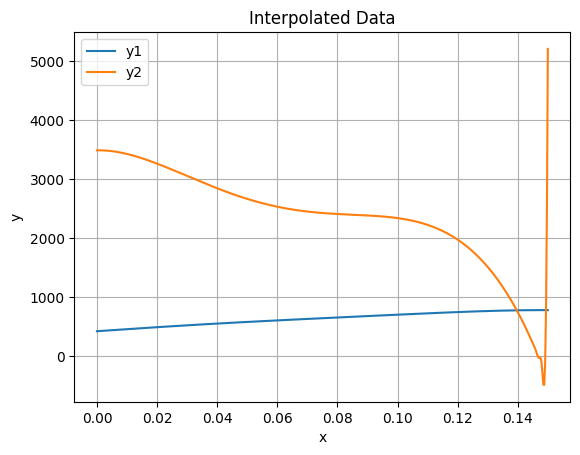

Intersection Point (x, y1, y2): (0.13966150972902633, array(777.60447471), array(777.60447471))


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.interpolate import make_interp_spline

# Read data from Excel file
file_path = '/content/Data.xlsx'
df = pd.read_excel(file_path)

# Extract x, y1, and y2 columns
x_column = "t. strain.4"
y1_column = "t. stress.4"
y2_column = "hard.Rate.4"
x = df[x_column].values
y1 = df[y1_column].values
y2 = df[y2_column].values

# Remove NaNs and infs from the data
valid_indices = np.isfinite(x) & np.isfinite(y1) & np.isfinite(y2)
x = x[valid_indices]
y1 = y1[valid_indices]
y2 = y2[valid_indices]

# Interpolate the data to obtain smooth curves
x_new = np.linspace(min(x), max(x), 500)
spline_y1 = make_interp_spline(x, y1)
spline_y2 = make_interp_spline(x, y2)
y1_smooth = spline_y1(x_new)
y2_smooth = spline_y2(x_new)

# Plot the interpolated data
plt.plot(x_new, y1_smooth, label='y1')
plt.plot(x_new, y2_smooth, label='y2')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpolated Data')
plt.legend()
plt.grid(True)
plt.show()

# Define a function to find the difference between the two curves
def equations(vars):
    x_val = vars[0]
    return spline_y1(x_val) - spline_y2(x_val)

# Initial guess for the intersection point
initial_guess = [0]

# Find the intersection point
intersection_point = fsolve(equations, initial_guess)

# Print the intersection point
print("Intersection Point (x, y1, y2):", (intersection_point[0], spline_y1(intersection_point[0]), spline_y2(intersection_point[0])))


In [ ]:
import numpy as np
import pandas as pd
from scipy.interpolate import make_interp_spline
from scipy.optimize import fsolve

# Read data from Excel file
file_path = '/content/Data.xlsx'  # Update the file path
df = pd.read_excel(file_path)

# Extract data for the first curve
x1 = df[x_axis].values
y1 = df[y1_axis].values

# Extract data for the second curve
x2 = df[x_axis].values
y2 = df[y2_axis].values

# Check for and handle NaN or infinite values for the first curve
mask_y1 = np.isfinite(x1) & np.isfinite(y1)
x1 = x1[mask_y1]
y1 = y1[mask_y1]

# Check for and handle NaN or infinite values for the second curve
mask_y2 = np.isfinite(x2) & np.isfinite(y2)
x2 = x2[mask_y2]
y2 = y2[mask_y2]

# Set the value of k for spline interpolation
k_value = 3

# Perform cubic spline interpolation for the first curve
spline_interp_y1 = make_interp_spline(x1, y1, k=k_value)

# Perform cubic spline interpolation for the second curve
spline_interp_y2 = make_interp_spline(x2, y2, k=k_value)

# Fit cubic polynomial to the entire dataset for the first curve
coefficients_y1 = np.polyfit(x1, y1, k_value)

# Fit cubic polynomial to the entire dataset for the second curve
coefficients_y2 = np.polyfit(x2, y2, k_value)

# Define a function to find the difference between the two equations
def equations(vars):
    x, y = vars
    eq1 = np.polyval(coefficients_y1, x) - y
    eq2 = np.polyval(coefficients_y2, x) - y
    return [eq1, eq2]

# Initial guess for the intersection point
initial_guess = [0, 0]

# Find the intersection point
intersection_point = fsolve(equations, initial_guess)

# Calculate y values at the intersection point
y1_intersection = np.polyval(coefficients_y1, intersection_point[0])
y2_intersection = np.polyval(coefficients_y2, intersection_point[0])

# Print the equations of both curves and the intersection point
print("Equation for Curve 1:")
print(np.poly1d(coefficients_y1))
print()
print("Equation for Curve 2:")
print(np.poly1d(coefficients_y2))
print()
print("Intersection Point (x, y1, y2):", (intersection_point[0], y1_intersection, y2_intersection))


Equation for Curve 1:
            3        2
-1.686e+04 x - 2958 x + 3242 x + 427.3

Equation for Curve 2:
            3             2
-2.462e+06 x + 4.845e+05 x - 3.868e+04 x + 3742

Intersection Point (x, y1, y2): (0.14553640510826843, 784.5822253024853, 784.5822253090682)


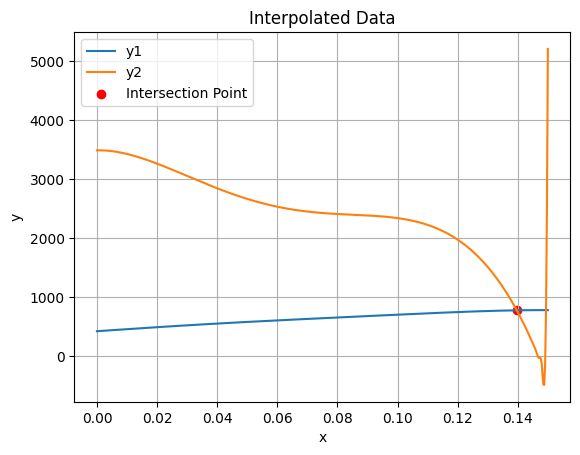

Intersection Point (x, y1, y2): (0.13966150972902633, array(777.60447471), array(777.60447471))


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from scipy.interpolate import make_interp_spline

# Read data from Excel file
file_path = '/content/Data.xlsx'
df = pd.read_excel(file_path)

# Extract x, y1, and y2 columns
x = df[x_axis].values
y1 = df[y1_axis].values
y2 = df[y2_axis].values

# Remove NaNs and infs from the data
valid_indices = np.isfinite(x) & np.isfinite(y1) & np.isfinite(y2)
x = x[valid_indices]
y1 = y1[valid_indices]
y2 = y2[valid_indices]

# Interpolate the data to obtain smooth curves
x_new = np.linspace(min(x), max(x), 500)
spline_y1 = make_interp_spline(x, y1)
spline_y2 = make_interp_spline(x, y2)
y1_smooth = spline_y1(x_new)
y2_smooth = spline_y2(x_new)

# Plot the interpolated data
plt.plot(x_new, y1_smooth, label='y1')
plt.plot(x_new, y2_smooth, label='y2')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Interpolated Data')

# Define a function to find the difference between the two curves
def equations(vars):
    x_val = vars[0]
    return spline_y1(x_val) - spline_y2(x_val)

# Initial guess for the intersection point
initial_guess = [0]

# Find the intersection point
intersection_point = fsolve(equations, initial_guess)

# Plot the intersection point
plt.scatter(intersection_point[0], spline_y1(intersection_point[0]), color='red', label='Intersection Point')

plt.legend()
plt.grid(True)
plt.show()

# Print the intersection point
print("Intersection Point (x, y1, y2):", (intersection_point[0], spline_y1(intersection_point[0]), spline_y2(intersection_point[0])))
